<a href="https://colab.research.google.com/github/fmbento/Jupyter-Notebooks_ad-hoc-solutions/blob/main/GLAM_Labs_Data_Visualization_All_Cells_Executed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **IMPORTANT**
> Although you will see a lot of code in this Notebook (Python), for this exercise you **do not need to have any programming knowledge** (AI will provide valuable help).

# Basic Visualizations from Height, Weight and Gender Data
### Data file automatically obtained from Kaggle, dataset [Gender-Height-Weight.csv](https://www.kaggle.com/datasets/sonalisingh1411/genderheightweightcsv)

**Adapted** from https://colab.research.google.com/drive/1MdbnCQs13g6h4SFqQfWzgmeoRMnMGOtH?usp=sharing

**Based** on:
* https://machinelearningmastery.com/quick-and-dirty-data-analysis-with-pandas/
* https://pylenin.hashnode.dev/data-analytics-with-matplotlib
* https://medium.com/@ayushmandurgapal/data-visualization-using-python-1f0b032ff2db

In [ ]:
!pip install plotly open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


# Get the data

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("sonalisingh1411/genderheightweightcsv")

print("Path to dataset files:", path)

# Get the list of files in the directory
files = os.listdir(path)

# Assuming the CSV file is the first file in the list
csv_file_name = files[0]

# Create the full path to the CSV file
csv_file_path = os.path.join(path, csv_file_name)

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(csv_file_path)

100%|██████████| 167k/167k [00:00<00:00, 49.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sonalisingh1411/genderheightweightcsv/versions/1


In [ ]:
# Show some example rows
print( data )

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


# Pre-Process the data

In [ ]:
# The data seems to be in US american units, i.e. inches and pounds.

# Convert Height from inches to centimeters
data['Height'] = data['Height'] * 2.54

# Convert Weight from pounds to kilograms
data['Weight'] = data['Weight'] * 0.453592

# While we are at it, also change the category from text to number.
# Map Gender to numerical values (0 for Female, 1 for Male)
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
# Again, show some example rows. Now the data seems to be in the correct units (cm/kg)
print( data )

      Gender      Height      Weight
0          1  187.571423  109.720985
1          1  174.706036   73.622732
2          1  188.239668   96.497550
3          1  182.196685   99.809504
4          1  177.499761   93.598619
...      ...         ...         ...
9995       0  168.078536   62.041159
9996       0  170.350573   77.504315
9997       0  162.224700   58.275377
9998       0  175.346978   74.322166
9999       0  157.338385   51.550324

[10000 rows x 3 columns]


# Describe the data

In [ ]:
# Get information about the structure
data.info()

# Non-Null Count: The number of non-null (non-missing) values in each column.
# Dtype: The data type of the column values. "int64" represents 64-bit integer numbers. "float64" represents 64-bit floating-point numbers. "object" typically represents text or categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [ ]:
# Get information about the statistics
print( data.describe() )

             Gender        Height        Weight
count  10000.000000  10000.000000  10000.000000
mean       0.500000    168.573602     73.228054
std        0.500025      9.772721     14.564131
min        0.000000    137.828359     29.347460
25%        0.000000    161.304276     61.605982
50%        0.500000    168.447898     73.124894
75%        1.000000    175.702625     84.898599
max        1.000000    200.656806    122.465167


# Start with simple visualization

Feature distribution: The first and easy property to review is the distribution of each attribute. This lets you note interesting properties of the attribute distributions such as the possible normal distribution of attributes

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

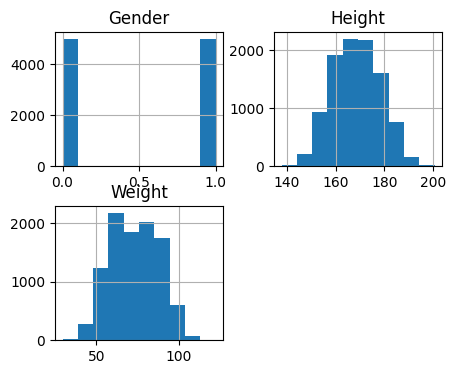

In [ ]:
# Show histogram
data.hist(figsize=(5,4))

The next important relationship to explore is that of each attribute to the class attribute.

One approach is to visualize the distribution of attributes for data instances for each class and note and differences. You can generate a matrix of histograms for each attribute and one matrix of histograms for each class value. The data is grouped by the class attribute (two groups) then a matrix of histograms is created for the attributes is in each group. The result is two images.

,0
Gender,
0,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."
1,"[[Axes(0.125,0.545217;0.336957x0.334783), Axes..."


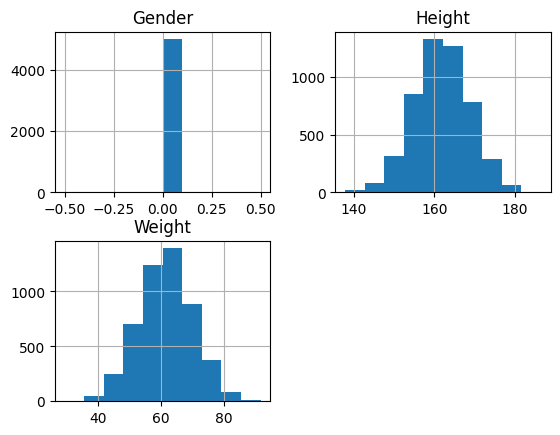

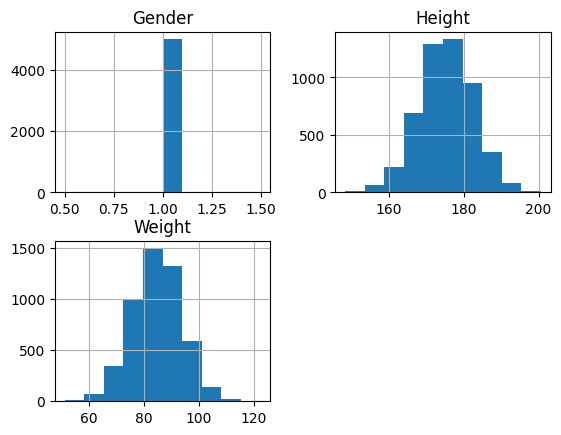

In [ ]:
data.groupby('Gender').hist()


You can better contrast the attribute values for each class on the same plot. This groups the data by class by only plots the histogram of plas showing the class value of 0 in red and the class value of 1 in blue. You can see a similar shaped normal distribution, but a shift. This attribute is likely going to be useful to discriminate the classes.

,Height
Gender,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


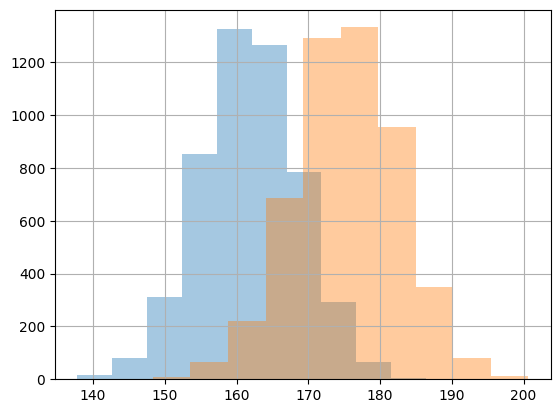

In [ ]:
data.groupby('Gender').Height.hist(alpha=0.4)

Another way to show this information is to use a Violin plot. However, the violin plot provides a more detailed visualization of the distribution of an attribute (here: heights) for each class (here: gender). Unlike the histogram, which shows the frequency of values, the violin plot displays both the probability density of the data and key summary statistics, such as the mean and median. The mean is marked with a point, while the median is marked with a line, providing a quick comparison of central tendencies.

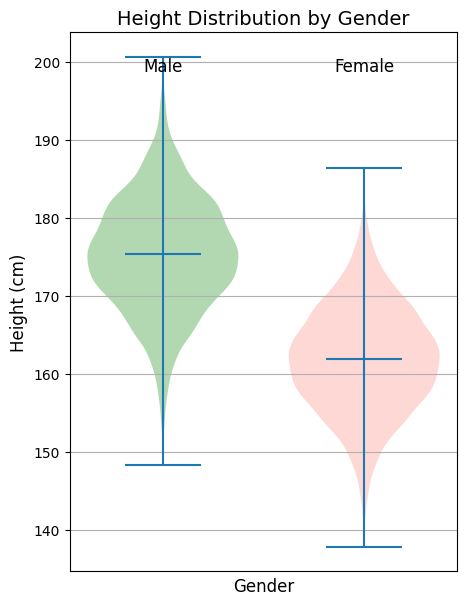

In [ ]:
import matplotlib.pyplot as plt

# Assuming `data` DataFrame contains the relevant columns
colors = ['green', 'salmon']

# Create the figure
plt.figure(figsize=(5, 7))

# Violin plot for height based on gender
violin_parts = plt.violinplot(
    [data[data['Gender'] == 1]['Height'],  # Male
     data[data['Gender'] == 0]['Height']],  # Female
    showmeans=False,
    showmedians=True,
    widths=0.3,
    positions=[1, 1.4],
    vert=True,
    showextrema=True
)

# Set colors for the violins
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)

# Add labels and text
labels = ["Male", "Female"]
plt.text(1, max(data['Height']), "Male", ha='center', va="top", fontsize=12)
plt.text(1.4, max(data['Height']), "Female", ha='center', va="top", fontsize=12)

# Customize axes and title
plt.xlabel('Gender', size=12)
plt.ylabel('Height (cm)', size=12)
plt.title('Height Distribution by Gender', size=14)
plt.xticks([])  # Remove default x-axis ticks
plt.grid(True)

# Display the plot
plt.show()


We can also do it with another library with a little less code...

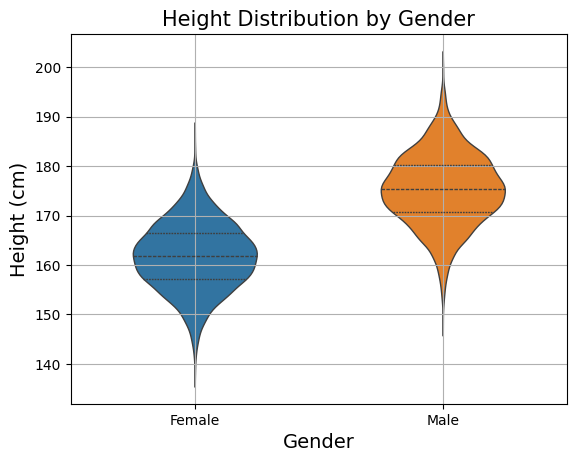

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected Seaborn violin plot
sns.violinplot(
    data=data,
    x="Gender", y="Height", hue="Gender",
    legend=False, linewidth=1, width=0.5,
    inner="quartile"
)

# Customize labels and title
plt.xlabel('Gender', size=14)
plt.ylabel('Height (cm)', size=14)
plt.title('Height Distribution by Gender', size=15)
plt.xticks([0, 1], ['Female', 'Male'])  # Map numeric Gender to categorical labels
plt.grid(True)

# Show the plot
plt.show()


Feature-Feature Relationships: The final important relationship to explore is that of the relationships between the attributes.

We can review the relationships between attributes by looking at the distribution of the interactions of each pair of attributes. This uses a built function to create a matrix of scatter plots of all attributes versus all attributes. The diagonal where each attribute would be plotted against itself shows the Kernel Density Estimation of the attribute instead.

array([[<Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Weight', ylabel='Height'>],
       [<Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>]], dtype=object)

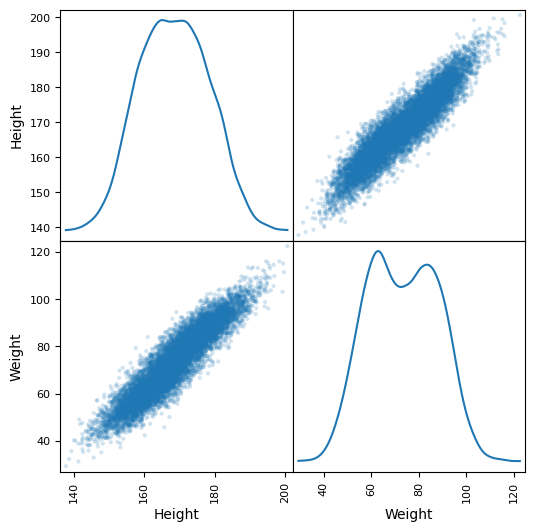

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Height', 'Weight']], alpha=0.2, figsize=(6, 6), diagonal='kde')

We can also intrgrate this into one plot...

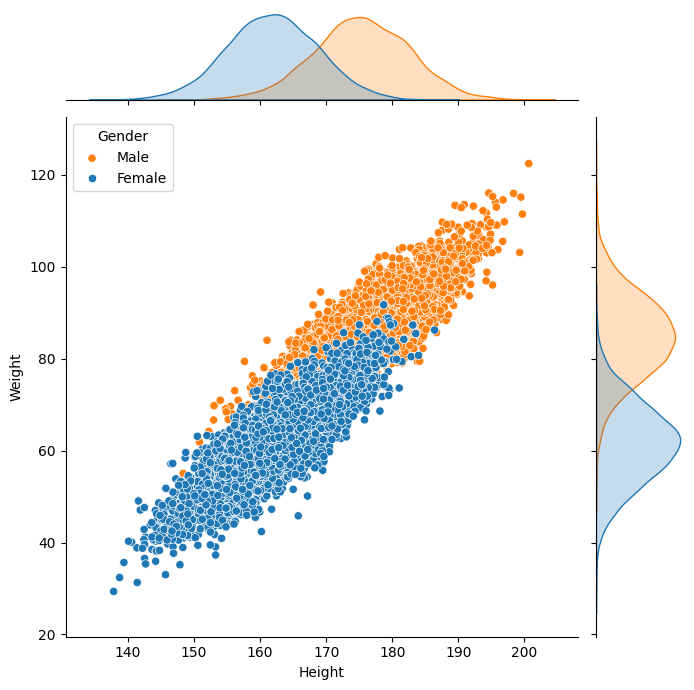

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint plot for Height and Weight
g = sns.jointplot(
    data=data,
    x="Height", y="Weight", hue="Gender",
    height=7, marker="o"
)

# Access the main joint plot axis
ax = g.ax_joint

# Move the legend to a specific location
ax.legend(title="Gender", loc="upper left", fontsize=10, labels=["Male", "Female"])

# Show the plot
plt.show()


# More Examples...

In [ ]:
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010, 2020],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3, 7.9]
       }

df = pd.DataFrame(Data, columns = ['Year', 'Unemployment_Rate'])

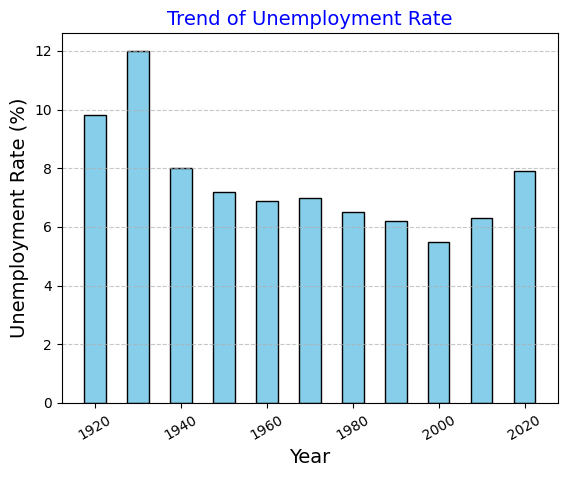

In [ ]:
# Bar chart
plt.bar(df.Year, df.Unemployment_Rate, color='skyblue', edgecolor='black', width=5)

# Add title and labels
plt.title('Trend of Unemployment Rate', color='Blue', size=14)
plt.xlabel('Year', size=14)
plt.ylabel('Unemployment Rate (%)', size=14)

# Customize the plot style
plt.style.use('fivethirtyeight')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines
plt.xticks(rotation=30)  # Rotate x-axis labels

# Show the plot
plt.show()


Line Chart

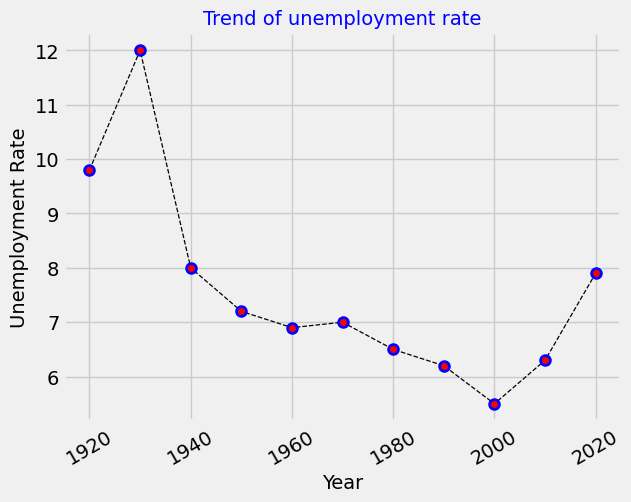

In [ ]:
plt.plot(df.Year, df.Unemployment_Rate, marker = 'o', color = 'black',
         linewidth = 0.9, linestyle = '--',
         markeredgecolor = 'blue',
         markeredgewidth = '2.0',
         markerfacecolor = 'red', markersize = 7.0)
plt.title('Trend of unemployment rate', color = 'Blue', size = 14)
plt.xlabel('Year', size = 14)
plt.ylabel('Unemployment Rate', size = 14)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.xticks(rotation = 30)
plt.show()

Area Chart

Text(0.5, 1.0, 'Unemployment Rate Trend')

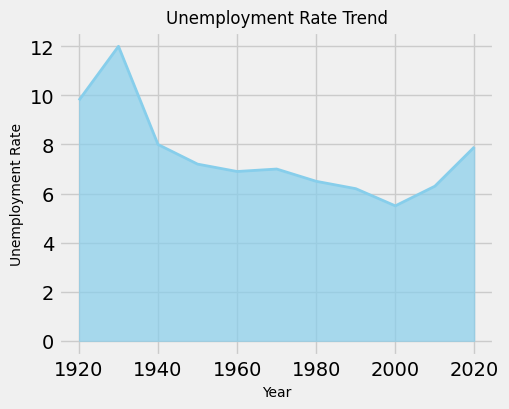

In [ ]:
fig = plt.figure(figsize = (5,4))
plt.fill_between(df['Year'], df['Unemployment_Rate'], color='skyblue',
alpha=0.7)
plt.plot(df['Year'], df['Unemployment_Rate'], color='skyblue', linewidth = 2)
plt.xlabel("Year", size = 10)
plt.ylabel("Unemployment Rate", size = 10)
plt.title("Unemployment Rate Trend", size = 12)

Pie Chart

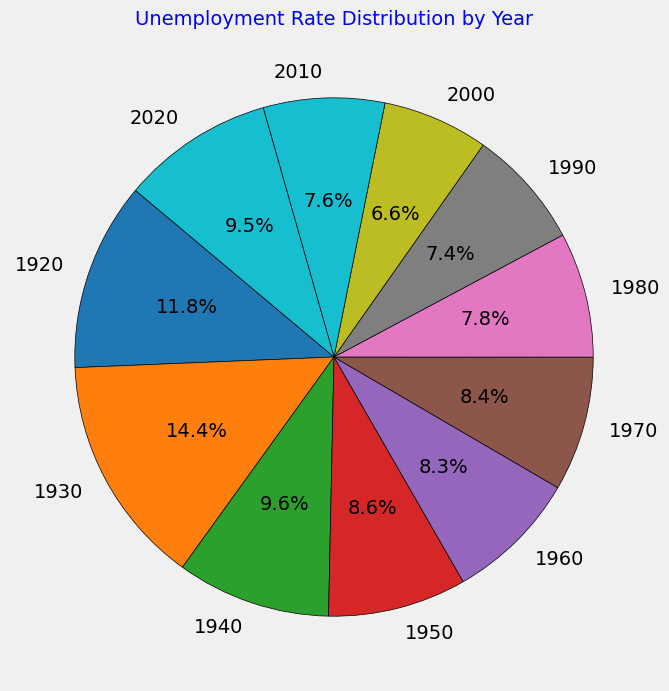

In [ ]:
# Create Pie Chart
plt.figure(figsize=(8, 8))
colors = plt.cm.tab10(range(len(df)))  # Use a colormap for consistent coloring
plt.pie(
    df['Unemployment_Rate'],
    labels=df['Year'],
    autopct='%1.1f%%',  # Add percentage display
    startangle=140,     # Rotate the pie chart for better readability
    colors=colors,
    wedgeprops={'edgecolor': 'black'}  # Add black edges to wedges
)

# Add Title
plt.title('Unemployment Rate Distribution by Year', color='Blue', size=14)

# Show the plot
plt.show()

Or something completely different...

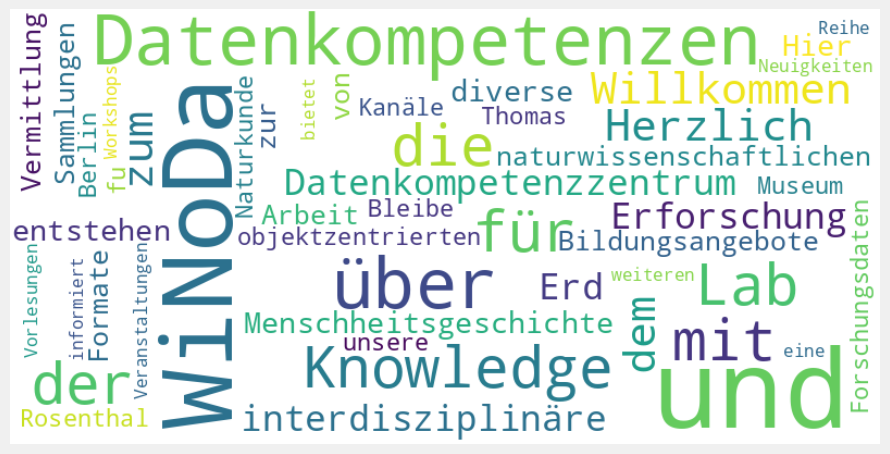

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the URL of the website
url = "https://winoda.de"

# Fetch the HTML content of the website
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract text content from the HTML
# This grabs all the text content from the <p> tags (you can customize this if needed)
text_content = " ".join([p.text for p in soup.find_all('p')])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_font_size=100,
    max_words=50,
    margin=5,
    prefer_horizontal=0.7
)
wordcloud.generate(text_content)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Or 3d?

In [ ]:
import requests
import os

# Define the URL of the PLY file
ply_file_url = "https://github.com/MatPixel/dataset-for-3d-pointcloud-processing-3d-deep-learning/raw/main/mug-only-vertices.ply"
# ply_file_url = "https://github.com/MatPixel/dataset-for-3d-pointcloud-processing-3d-deep-learning/raw/main/bunny-pcd.ply"

# Define the local path to save the downloaded PLY file
ply_file_path_local = "mug-only-vertices.ply"

# Download the PLY file from the URL
response = requests.get(ply_file_url, stream=True)
if response.status_code == 200:
    with open(ply_file_path_local, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f"PLY file downloaded successfully and saved to {ply_file_path_local}")
else:
    print(f"Failed to download PLY file. Status code: {response.status_code}")
    exit()

PLY file downloaded successfully and saved to mug-only-vertices.ply


Point cloud details: (1725, 3)


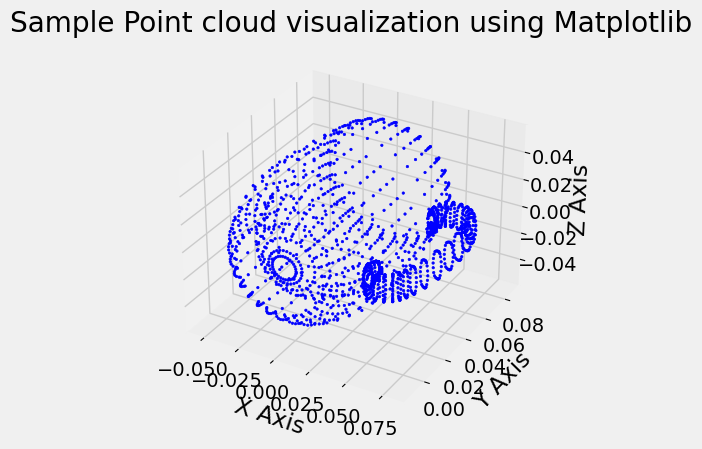

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

# Load the point cloud data from the PLY file
pointcloud = o3d.io.read_point_cloud(ply_file_path_local)
pointcloud_array = np.asarray(pointcloud.points)

# Print the shape of the point cloud data
print(f"Point cloud details: {np.shape(pointcloud_array)}")

# Visualize the point cloud using Matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pointcloud_array[:, 0],
          pointcloud_array[:, 1],
          pointcloud_array[:, 2],
          s=3,
          c='blue',
          alpha=1.0)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.title('Sample Point cloud visualization using Matplotlib')
plt.show()



In [ ]:
import plotly.graph_objects as go

# Create an interactive 3D scatter plot using Plotly
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=pointcloud_array[:, 0],
            y=pointcloud_array[:, 1],
            z=pointcloud_array[:, 2],
            mode='markers',
            marker=dict(
                size=2,
                color='blue',
                opacity=0.8
            )
        )
    ]
)

# Add labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    title="Interactive 3D Point Cloud Visualization"
)

# Show the plot
fig.show()